[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


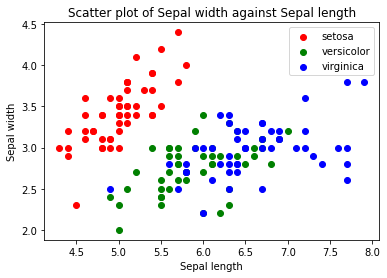

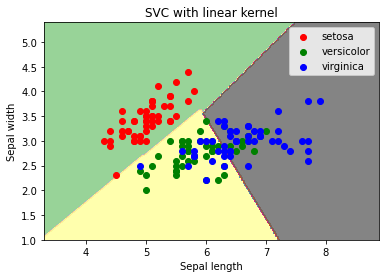

(array([0, 1, 2]), array([50, 53, 47], dtype=int64))


In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
print(iris.data[0:5]) # print first 5 rows
print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)',
 # 'petal length (cm)', 'petal width (cm)']
print(iris.target[0:5]) # print first 5 rows
print(iris.target_names) # ['setosa' 'versicolor' 'virginica']

X = iris.data[:, :2] # take the first two features
y = iris.target

#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C).fit(X, y)
title = 'SVC with linear kernel'
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)  # 바닥 칠하기, 점찍기 전에 해야 점이 표시됨
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

predictions = clf.predict(X)
print(np.unique(predictions, return_counts=True))

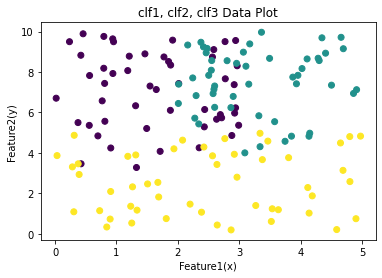

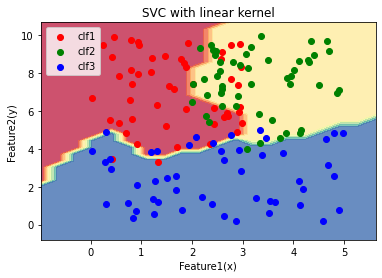

(array([0, 1, 2]), array([48, 55, 47], dtype=int64))


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

x = []
y = []
clf = []

# Generate Classification 1
for i in range(50):
    x.append(np.random.uniform(0,3))
    y.append(np.random.uniform(3,10))
    clf.append(0)

# Generate Classification 2
for i in range(50):
    x.append(np.random.uniform(2,5))
    y.append(np.random.uniform(4,10))
    clf.append(1)

# Generate Classification 3
for i in range(50):
    x.append(np.random.uniform(0,5))
    y.append(np.random.uniform(0,5))
    clf.append(2)

df = pd.DataFrame(np.c_[x,y,clf],columns=['x','y','clf'])
X = np.c_[x,y]

#---plot the points---
#colors = ['red', 'green', 'blue']
#for color, i, target in zip(colors, clf, ['clf1','clf2','clf3']):
#    plt.scatter(X[clf==i, 0], X[clf==i, 1], color=color, label=target)

plt.scatter(x,y,c=clf, label=clf)
plt.xlabel('Feature1(x)')
plt.ylabel('Feature2(y)')
#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('clf1, clf2, clf3 Data Plot')
plt.show()

C = 1 # SVM regularization parameter
G = 10
regclf = svm.SVC(kernel='linear', C=C, gamma=G).fit(X, clf)
title = 'SVC with linear kernel'
#---min and max for the first feature---
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
#---step size in the mesh---
h = (x_max-x_min)/20
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = regclf.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='Spectral', alpha=0.8)  # 바닥 칠하기, 점찍기 전에 해야 점이 표시됨
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], ['clf1','clf2','clf3']):
    plt.scatter(df.iloc[df['clf'].values==i, 0], df.iloc[df['clf'].values==i, 1], color=color, label=target)
#plt.scatter(x,y,c=clf, label=clf)
plt.xlabel('Feature1(x)')
plt.ylabel('Feature2(y)')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

predictions = regclf.predict(X)
print(np.unique(predictions, return_counts=True))

- 상관계수행렬:
          Variance  Skewness  Curtosis   Entropy     Class
Variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
Skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
Curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
Entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
Class    -0.724843 -0.444688  0.155883 -0.023424  1.000000 

- 가장 상관계수 큰 2개 컬럼: Variance , Skewness


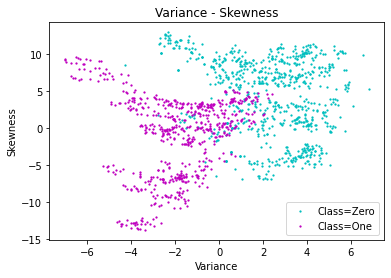

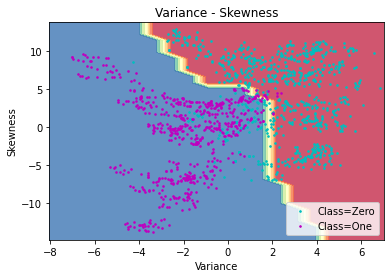

(array([0, 1], dtype=int64), array([672, 700], dtype=int64))
-평가
kernel: poly C: 1 Gamma: 1
---Accuracy---
0.9154518950437318


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# csv파일의 데이터를 사용한 SVM 모델링
df_origin = pd.read_csv('bill_authentication.csv')

# display(df)

# 분석대상컬럼 2개 판단
print('- 상관계수행렬:')
print(df_origin.corr(),'\n')
cor_2 = df_origin.corr().abs().nlargest(3,'Class').drop('Class')['Class']
print('- 가장 상관계수 큰 2개 컬럼:',cor_2.index[0],',',cor_2.index[1])

df = df_origin[[cor_2.index[0],cor_2.index[1],'Class']]

colors = ['c', 'm']
for color, i, target in zip(colors, [0, 1], ['Class=Zero','Class=One']):
    plt.scatter(df.iloc[df['Class'].values==i, 0], df.iloc[df['Class'].values==i, 1], color=color, label=target, s=1.5)
plt.xlabel(cor_2.index[0])
plt.ylabel(cor_2.index[1])
plt.title(cor_2.index[0]+' - '+cor_2.index[1])
plt.legend(loc='best')
plt.show()

x=df[cor_2.index[0]]
y=df[cor_2.index[1]]

C = 1 # SVM regularization parameter
G = 1
kern = 'poly'
regclf = svm.SVC(kernel=kern,C=C,gamma='auto',degree=3).fit(df[[cor_2.index[0],cor_2.index[1]]],df['Class'])
title = 'SVC with linear kernel'
#---min and max for the first feature---
x_min, x_max = x.min()-1, x.max()+1
#---min and max for the second feature---
y_min, y_max = y.min()-1, y.max()+1
#---step size in the mesh---
h = (x_max-x_min)/20
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = regclf.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='Spectral', alpha=0.8)  # 바닥 칠하기, 점찍기 전에 해야 점이 표시됨
#---plot the training points---
for color, i, target in zip(colors, [0, 1], ['Class=Zero','Class=One']):
    plt.scatter(df.iloc[df['Class'].values==i, 0], df.iloc[df['Class'].values==i, 1], color=color, label=target, s=2.5)
#plt.scatter(x,y,c=clf, label=clf)
plt.xlabel(cor_2.index[0])
plt.ylabel(cor_2.index[1])
plt.title(cor_2.index[0]+' - '+cor_2.index[1])
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

predictions = regclf.predict(df[[cor_2.index[0], cor_2.index[1]]])
print(np.unique(predictions, return_counts=True))

print('-평가')
print('kernel:', kern, 'C:',C, 'Gamma:',G)
#---get the accuracy of the prediction---
print("---Accuracy---")
print(regclf.score(X = df[[cor_2.index[0], cor_2.index[1]]], y = df['Class']))

In [11]:
# KNN
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#---to calculate the distance between two points---
def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance)

#---our own KNN model---
def knn(training_points, test_point, k):
    distances = {}
    #---the number of axes we are dealing with---
    dimension = test_point.shape[1]
    #--calculating euclidean distance between each
    # point in the training data and test data
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
        #---record the distance for each training points---
        distances[x] = dist[0]
    #---sort the distances---
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #---to store the neighbors---
    neighbors = []
    #---extract the top k neighbors---
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #---for each neighbor found, find out its class---
    class_counter = {}
    for x in range(len(neighbors)):
        #---find out the class for that particular point---
        cls = training_points.iloc[neighbors[x]][-1]
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1
    #---sort the class_counter in descending order---
    sorted_counter = sorted(class_counter.items(), key=operator.itemgetter(1), reverse=True)
    #---return the class with the most count, as well as the
    #neighbors found---
    return(sorted_counter[0][0], neighbors)

#---test point---
test_set = [[3,3.9]]
test = pd.DataFrame(test_set)
cls,neighbors = knn(data, test, 5)
print("Predicted Class: " + cls)

NameError: name 'data' is not defined